# Random Stock performance Hypothesis testing

Allords performance over the period: 19.3218%, or actual return $62,047.34

## Importing modules and loading csv of data

In [193]:
import logging, pandas as pd, datetime, random, numpy as np, matplotlib.pyplot as plt, math, scipy.stats as stats, matplotlib.ticker as tck

stocks = pd.read_csv('RandomStockPerformance.csv')      

## Identifying and removing outliers

Calculating Median Average Divergence to identify outliers. Merging outpuut of function to data and removing the outliers.

In [194]:
def mad_based_outlier(points, thresh=3.5):
    """
        Function to calculate the Median Avervage Divergence
        
        Returns an array of True or False identifiers of outliers.
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

outliers = pd.DataFrame(mad_based_outlier(array_dirty))
outliers.rename(columns={0: 'Outlier'}, inplace = True)

array_merge = pd.concat([stocks, outliers], axis=1)

array = array_merge.loc[array_merge['Outlier'] == False]['fProfit']

## Running the T-Test

In [195]:
print(stats.describe(array))
print(stats.t.pdf(rst, array.count()-1))
print(stats.norm.fit(data = array))
print(stats.ttest_1samp(array, 62047.34))

DescribeResult(nobs=9880, minmax=(41197.9236698064, 88453.9034777979), mean=61650.09860919222, variance=61887351.03927146, skewness=0.7352234320093913, kurtosis=0.44014743900289544)
1.3706239630201237e-06
(61650.09860919222, 7866.453275609308)
Ttest_1sampResult(statistic=-5.019171311733917, pvalue=5.279978152442527e-07)


## Plotting the data against a normal distribution

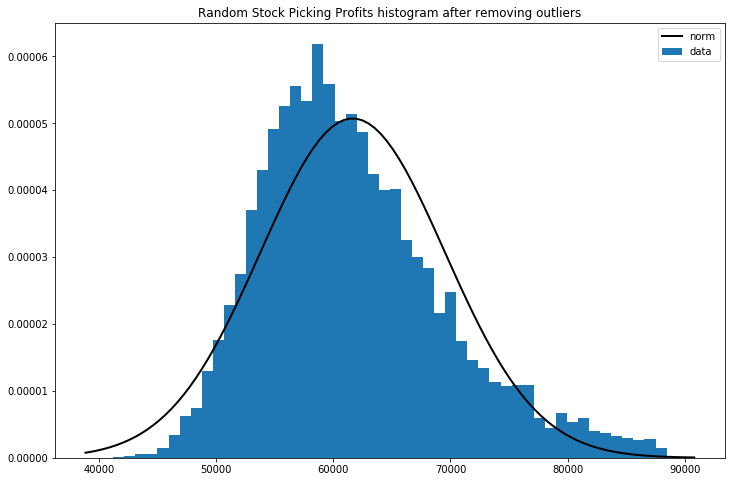

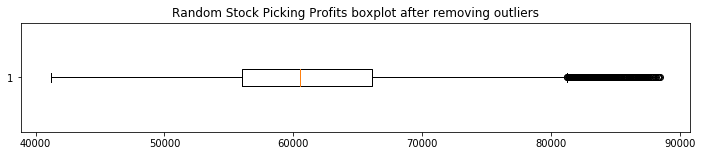

In [196]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.hist(array, bins = 50, density=True, label = 'data')

mu, std = stats.norm.fit(data = array)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label = 'norm')
plt.title("Random Stock Picking Profits histogram after removing outliers")
plt.legend(loc='best')


plt.show()

plt.rcParams['figure.figsize'] = [12, 2]
plt.boxplot(array, vert = False)
plt.title("Random Stock Picking Profits boxplot after removing outliers")
plt.show()